In [ ]:
!git clone https://github.com/dagrate/public_data_crisprCas9.git
%cd public_data_crisprCas9

Cloning into 'public_data_crisprCas9'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 406 (delta 93), reused 145 (delta 46), pack-reused 117 (from 1)
Receiving objects: 100% (406/406), 25.58 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (120/120), done.
/content/public_data_crisprCas9/public_data_crisprCas9


In [ ]:
!ls -R

.:
a_demo_of_a_simple_classification_model.ipynb  data  README.md

./data:
deepcrispr  kleinstiver2015	      readme.txt  site_seq
deepHF	    listgarten_elevation_hmg  sgDesigner  wang2014genetic

./data/deepcrispr:
eg_cls_off_target.epiotrt   eg_reg_on_target.repisgt
eg_cls_on_target.episgt     eg_reg_on_target_seq.rsgt
eg_reg_off_target.repiotrt  readme.txt

./data/deepHF:
deephf.zip  readme.txt

./data/kleinstiver2015:
Kleinstiver_5gRNA_wholeDataset.csv

./data/listgarten_elevation_hmg:
listgarten_elevation_hmg.pkl

./data/sgDesigner:
 bioinformatics_36_9_2684_s6.zip  'Supplementary Tables 1-5.xlsx'

./data/site_seq:
41592_2017_BFnmeth4284_MOESM86_ESM.xlsx
41592_2017_BFnmeth4284_MOESM87_ESM.xlsx
41592_2017_BFnmeth4284_MOESM88_ESM.xlsx
41592_2017_BFnmeth4284_MOESM89_ESM.xlsx
41592_2017_BFnmeth4284_MOESM90_ESM.xlsx
41592_2017_BFnmeth4284_MOESM91_ESM.xlsx
41592_2017_BFnmeth4284_MOESM92_ESM.xlsx
41592_2017_BFnmeth4284_MOESM93_ESM.xlsx
readme.txt

./data/wang2014genetic:
NIHMS563765-suppl

In [ ]:
!ls data

deepcrispr  kleinstiver2015	      readme.txt  site_seq
deepHF	    listgarten_elevation_hmg  sgDesigner  wang2014genetic


In [ ]:
#Navigate to the deepcrispr folder
!ls data/deepcrispr/

eg_cls_off_target.epiotrt   eg_reg_on_target.repisgt
eg_cls_on_target.episgt     eg_reg_on_target_seq.rsgt
eg_reg_off_target.repiotrt  readme.txt


In [ ]:
import os
folder= "data/deepcrispr"
for file in os.listdir(folder):
  path= os.path.join(folder, file)
  print(file, os.path.getsize(path),
        "bytes")
 #Peek inside one file (Binary or text)
!head -n 5 data/deepcrispr/eg_cls_on_target.episgt

eg_reg_off_target.repiotrt 24816 bytes
eg_cls_off_target.epiotrt 24621 bytes
eg_reg_on_target.repisgt 16570 bytes
readme.txt 1 bytes
eg_cls_on_target.episgt 14788 bytes
eg_reg_on_target_seq.rsgt 696 bytes
chr17	33469132	33469154	-	CTTGCTCGCGCAGGACGAGGCGG	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	1
chr4	184605984	184606006	-	ACATCAGGTTACCTCTACCAAGG	AAAAAAAAAAAAANNNNNNNNNN	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	NNNNNNNNNNNNNNNNNNNNNNN	1
chr1	11736866	11736888	+	CTGATGCCAGCTAGTGGGCGAGG	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	NNNNNNNNNNNNNNNNNNNNNNN	0
chr4	25379067	25379089	+	CTGTTTCCCATCCTTCCGGGTGG	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNAANNNNN	1
chr12	57936737	57936759	-	AATGTATGCACAGGGAACAGAGG	AAAAAAAAAAAAAAANNNNNNNN	AAAAAAAAAAAAAAAAAAAAAAA	NNNNNNNNNNNNNNNNNNNNNNN	NNNNNNNNNNNNNNNNNNNNNNN	1


In [ ]:
#Make in table format
import pandas as pd
# Define the file you want to inspect (you can try each one)
file_path= "data/deepcrispr/eg_cls_on_target.episgt"

#Read as tab-separated file (it has no headers, so we'll assign temporary column names)
df= pd.read_csv(file_path, sep="\t", header=None, comment= "#", engine= "python")
print("Shape:", df.shape)
df.head(10)

Shape: (100, 10)


,0,1,2,3,4,5,6,7,8,9
0,chr17,33469132,33469154,-,CTTGCTCGCGCAGGACGAGGCGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
1,chr4,184605984,184606006,-,ACATCAGGTTACCTCTACCAAGG,AAAAAAAAAAAAANNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,1
2,chr1,11736866,11736888,+,CTGATGCCAGCTAGTGGGCGAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,0
3,chr4,25379067,25379089,+,CTGTTTCCCATCCTTCCGGGTGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNAANNNNN,1
4,chr12,57936737,57936759,-,AATGTATGCACAGGGAACAGAGG,AAAAAAAAAAAAAAANNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,1
5,chr2,131103494,131103516,-,CCAGACTCACCCGCTTGCCCAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
6,chr19,13044456,13044478,+,CATCAGACGCCTCCAGCCGCCGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNANN,1
7,chr11,62568644,62568666,-,CCTTGAACTTGAGCAACAACAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0
8,chrX,70764460,70764482,-,GGCTTCTTCCAAGCGACCCAGGG,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
9,chr11,67161213,67161235,-,GCACGAGGCTGGGTCGAAGACGG,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0


In [ ]:
for i in range(df.shape[1]):
  print(f"Column{1}: sample values -> {df.iloc[:3, i].tolist()}")

Column1: sample values -> ['chr17', 'chr4', 'chr1']
Column1: sample values -> [33469132, 184605984, 11736866]
Column1: sample values -> [33469154, 184606006, 11736888]
Column1: sample values -> ['-', '-', '+']
Column1: sample values -> ['CTTGCTCGCGCAGGACGAGGCGG', 'ACATCAGGTTACCTCTACCAAGG', 'CTGATGCCAGCTAGTGGGCGAGG']
Column1: sample values -> ['AAAAAAAAAAAAAAAAAAAAAAA', 'AAAAAAAAAAAAANNNNNNNNNN', 'AAAAAAAAAAAAAAAAAAAAAAA']
Column1: sample values -> ['AAAAAAAAAAAAAAAAAAAAAAA', 'AAAAAAAAAAAAAAAAAAAAAAA', 'AAAAAAAAAAAAAAAAAAAAAAA']
Column1: sample values -> ['AAAAAAAAAAAAAAAAAAAAAAA', 'NNNNNNNNNNNNNNNNNNNNNNN', 'NNNNNNNNNNNNNNNNNNNNNNN']
Column1: sample values -> ['NNNNNNNNNNNNNNNNNNNNNNN', 'NNNNNNNNNNNNNNNNNNNNNNN', 'NNNNNNNNNNNNNNNNNNNNNNN']
Column1: sample values -> [1, 1, 0]


In [ ]:
df.columns=[
    "Chromosome", "Start", "End", "Strand",
    "GuideRNA", "Seq1", "Seq2", "Seq3", "MaskSeq", "Label"
    ]

In [ ]:
display(df.head())

,Chromosome,Start,End,Strand,GuideRNA,Seq1,Seq2,Seq3,MaskSeq,Label
0,chr17,33469132,33469154,-,CTTGCTCGCGCAGGACGAGGCGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,1
1,chr4,184605984,184606006,-,ACATCAGGTTACCTCTACCAAGG,AAAAAAAAAAAAANNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,1
2,chr1,11736866,11736888,+,CTGATGCCAGCTAGTGGGCGAGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,0
3,chr4,25379067,25379089,+,CTGTTTCCCATCCTTCCGGGTGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNAANNNNN,1
4,chr12,57936737,57936759,-,AATGTATGCACAGGGAACAGAGG,AAAAAAAAAAAAAAANNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,1


In [ ]:
for nt in ["A", "T", "G", "C"]:
  df[f'{nt}_freq']= df['GuideRNA'].apply(lambda x: x.upper().count(nt)/len(x))

df[['GuideRNA', 'A_freq', 'T_freq', 'G_freq', 'C_freq', 'Label']].head()

,GuideRNA,A_freq,T_freq,G_freq,C_freq,Label
0,CTTGCTCGCGCAGGACGAGGCGG,0.130435,0.130435,0.434783,0.304348,1
1,ACATCAGGTTACCTCTACCAAGG,0.304348,0.217391,0.173913,0.304348,1
2,CTGATGCCAGCTAGTGGGCGAGG,0.173913,0.173913,0.434783,0.217391,0
3,CTGTTTCCCATCCTTCCGGGTGG,0.043478,0.347826,0.260870,0.347826,1
4,AATGTATGCACAGGGAACAGAGG,0.391304,0.130435,0.347826,0.130435,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Use nucleotide frequencies as features
features= ['A_freq', 'T_freq', 'G_freq', 'C_freq']
X= df[features]
y= df['Label']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

print("Confusion Matrix:\n", classification_report(y_test, y_pred))

Confusion Matrix:
               precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.92      0.67      0.77        18

    accuracy                           0.65        20
   macro avg       0.53      0.58      0.50        20
weighted avg       0.85      0.65      0.72        20



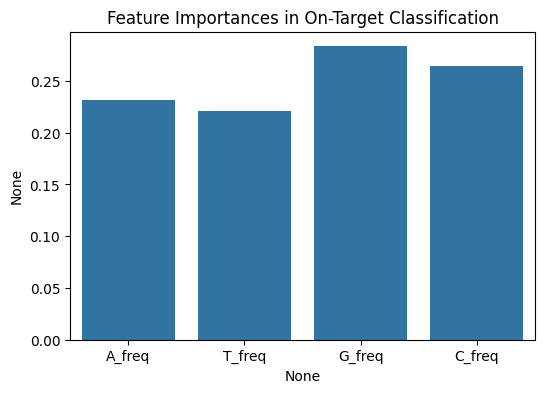

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances= pd.Series(model.feature_importances_, index= features)
plt.figure(figsize=(6, 4))
plt.title("Feature Importances in On-Target Classification")
sns.barplot(x= feat_importances.index, y= feat_importances)
plt.show()

For a horizontal graph when it comes out in barplot, try to change its x and y-axis. Then you will get vertical bars.